# Load libraries and models

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.io.parsers import read_csv
from skimage.color import rgb2gray
from tensorflow import keras 
import os
from skimage import img_as_ubyte

In [22]:
import requests
import time
import face_recognition
import pandas as pd
from os.path import basename
import math
import pathlib
from pathlib import Path
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw,ImageFont
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler 
import joblib

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
modelSeg = keras.models.load_model('2KImages_unet_neck_128')

## Predict the position of the skin

In [25]:
path = 'prova.jpg'
X = []
image = cv2.imread(path,0)
image = cv2.resize(image, (128,128))
X.append(image)
X = np.array(X)
X.shape
y_pred = modelSeg.predict(X)

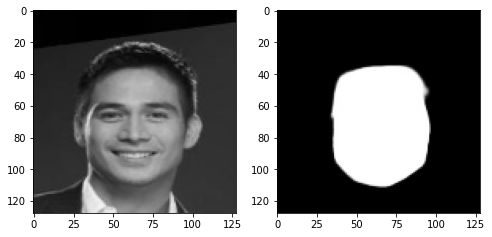

In [26]:
fig, axs = plt.subplots(1,2,figsize=(8,8))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
grey_y_pred = cv2.cvtColor(y_pred[0],cv2.COLOR_BGR2RGB)
axs[0].imshow(image)
axs[1].imshow(grey_y_pred)

#### Optional (Mix skin + face for recommender)

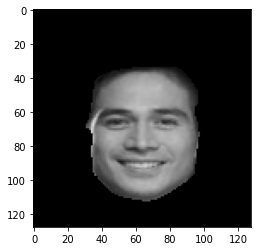

In [27]:
Prova = img_as_ubyte(grey_y_pred)
Final_Image = np.where(Prova != 0, image, 0)
plt.imshow(Final_Image)

## Predict type of shape to give hair recommendation

In [28]:
modelFace = joblib.load('model_face_shape.sav')
sc = joblib.load('std_scaler.bin')

In [29]:
%run -i face_shape_functions.py 

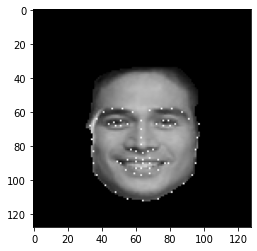

In [30]:
get_landmarks(Final_Image)

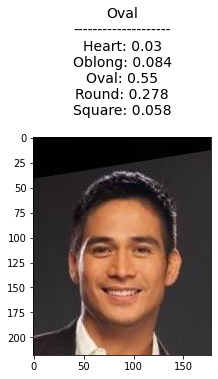

In [31]:
x = face_shape('prova.jpg')

### Give 3 suggestions of hair

## Fusion model skin with 3 hair recommendation

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
#need to change the directories! Requires the folder Hairstyles uploaded as Hairstyles in the Github!!! The code follows the same directory links
def recomendation():
    face_shape = x
    gender = input("Do you identify as a male(M) or a female(F)?")
    path = "Hairstyles"
    if(gender == 'F'): path +=  "/" + "Female" + "/" + face_shape
    else: path +=   "/"  "Male" + "/" + face_shape
    hairstyle_list = os.listdir(path)
    print("These are some hairstyles that you might like based on your Face Shape")
    cont = 0
    hairstyles = []
    for img in hairstyle_list:
        cont += 1
        image = mpimg.imread(path+"/"+img)
        imgplot = plt.imshow(image)
        hairstyle_name = ""
        for i in img:
            if(i == "."): break
            hairstyle_name += i
        hairstyles.append(hairstyle_name)
        plt.title(f"Example of a the Hairstyle {cont}  that suits well {face_shape} faces:")
        plt.show()
    
    number_hairstyle = int(input("Which one is your prefered one?(Number)"))
    print(f"You should tell your hairstylist that you want a {hairstyles[number_hairstyle-1]} Hairstyle")
    test = input("Would you like to see more examples of this hairstyle?(Y/N)")
    if(test == "Y"):
        path = "Hairstyles"
        if(gender == 'F'): path +=  "/" + "Female" + "/" + "Different Hairstyles"
        else: path +=   "/"  "Male" + "/" + "Different Hairstyles"
        path += "/" + hairstyles[number_hairstyle-1]
        hairstyle_list = os.listdir(path)
        print("These are the same Hairstyles on different faces:")
        for img in hairstyle_list:
            image = mpimg.imread(path+"/"+img)
            imgplot = plt.imshow(image)
            plt.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_10064/3814860503.py, line 7)

Do you identify as a male(M) or a female(F)?M
These are some hairstyles that you might like based on your Face Shape


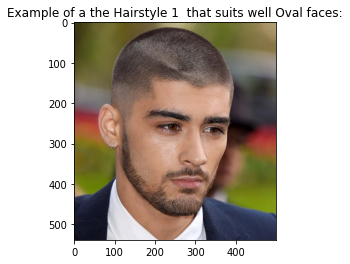

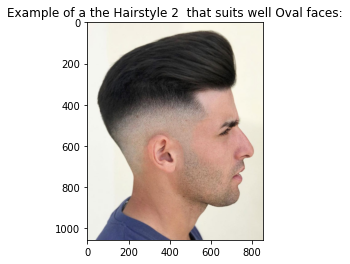

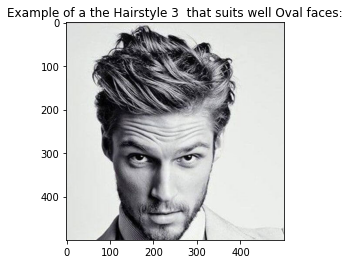

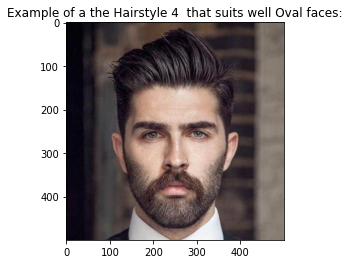

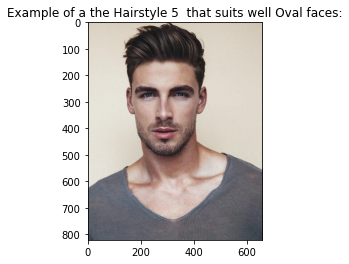

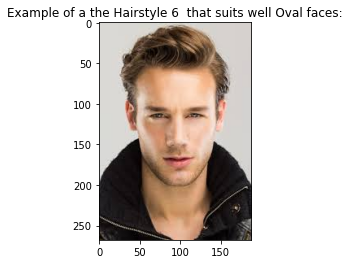

Which one is your prefered one?(Number)3
You should tell your hairstylist that you want a Messy Hairstyle
Would you like to see more examples of this hairstyle?(Y/N)Y
These are the same Hairstyles on different faces:


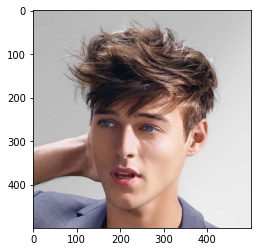

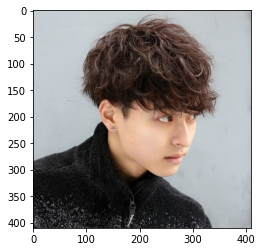

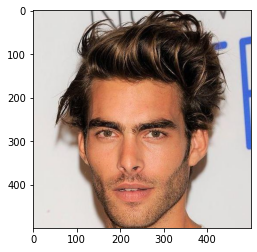

In [33]:
recomendation()
